# Distance Transforms

Compute the 3D or slice-wise Euclidean distance and signed distance transforms of a binary image. The underlying workhorse uses the [``euclidean-distance-transform-3d`` Python library](https://zenodo.org/doi/10.5281/zenodo.10815870).

___

## Import packages

In [26]:
import dpm_tools as dpm
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

## Demonstration image

To demonstrate the distance transforms, we generate a simple 3D binary image using the [PoreSpy blobs generator](https://porespy.org/examples/generators/tutorials/making_blobs.html) function. The example image size is $500 \times 500 \times 3$.

(-0.5, 499.5, 499.5, -0.5)

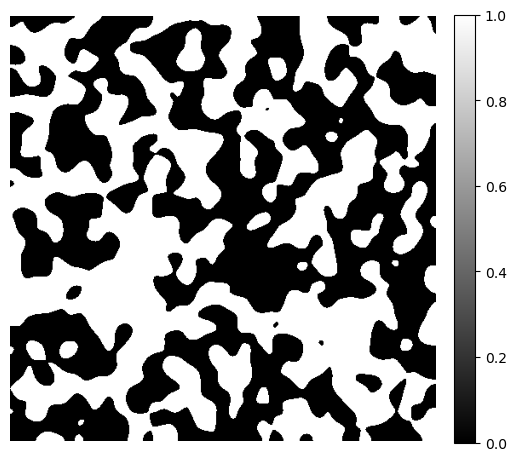

In [29]:
image = ps.generators.blobs(shape=[3, 500, 500])

fig, ax = plt.subplots(figsize=[6, 6])
im = ax.imshow(image[1], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax.axis(False)

## Euclidean Distance Transform

The Euclidean Distance Transform (EDT) computes the shortest (straight-line) distance from each background voxel to the nearest foreground voxel (typically representing an object or boundary). Mathematically, for a given point $x$ in the domain, the EDT is defined as:

$$
\text{EDT}(x) = \min_{y \in \Omega} \|x - y\|_2,
$$
​
where $\Omega$ is the set of foreground voxels, and $\| \cdot \|_2$ is the standard Euclidean norm.

The result is a non-negative scalar field where zero values correspond to the object boundary and increasing values represent growing distances from the object.

The ``edt`` function in the ``dpm_tools.metrics`` module expects a 2D or 3D ``np.ndarray`` where the phase of interest (foreground) is labeled as 1.

(-0.5, 499.5, 499.5, -0.5)

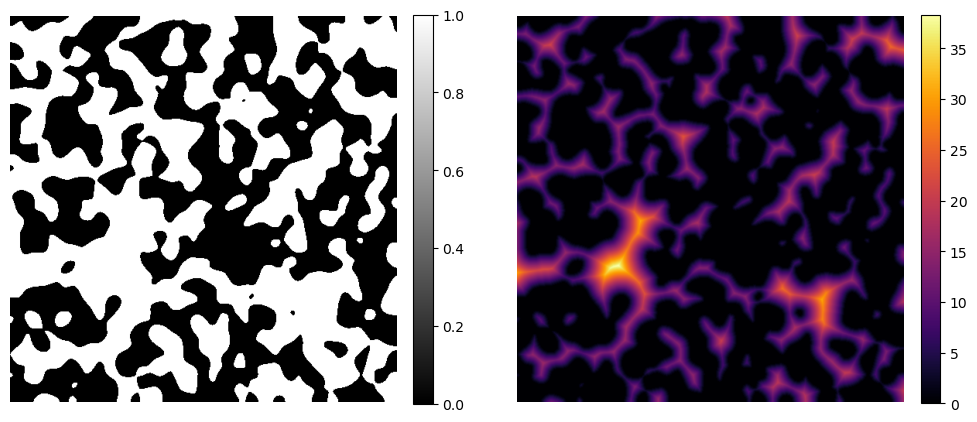

In [30]:
image_edt = dpm.metrics.edt(image)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
im = ax[0].imshow(image[1], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[0].axis(False)
im = ax[1].imshow(image_edt[1], cmap="inferno")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[1].axis(False)

### Slicewise EDT

DPM Tools also has a function to compute the slicewise EDT, where the transform is applied independently to each 2D slice. This approach may be useful when structures of interest vary primarily in 2D (e.g., layered structures) or when analyzing changes in EDT between subsequent slices.

The ``slicewise_edt`` function in the ``dpm_tools.metrics`` module expects a 2D or 3D ``np.ndarray`` where the phase of interest (foreground) is labeled as 1. 

***Note:*** This function takes the slicewise EDT along the third dimension of the input image.

(-0.5, 499.5, 499.5, -0.5)

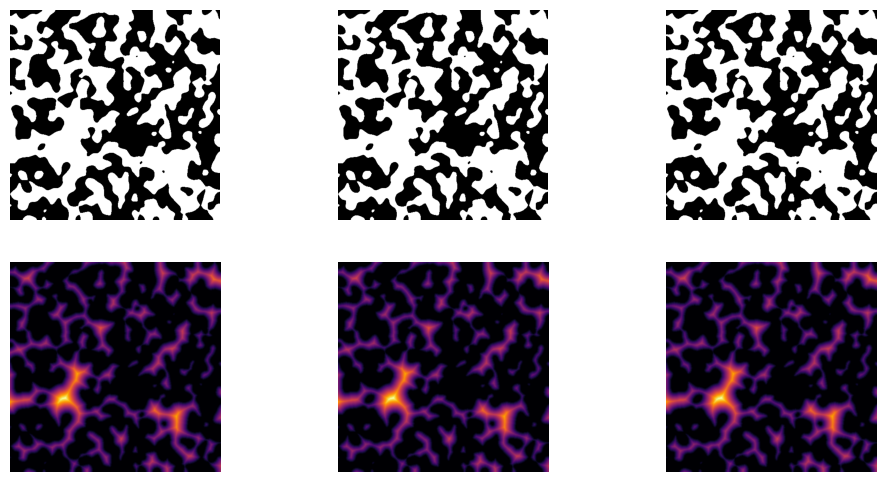

In [ ]:
image_slicewise_edt = dpm.metrics.slicewise_edt(np.swapaxes(image, 0, 2))
image_slicewise_edt = np.swapaxes(image_slicewise_edt, 0, 2)

fig, ax = plt.subplots(2, 3, figsize=[12, 6])
ax[0, 0].imshow(image[0], cmap="binary_r")
ax[0, 0].axis(False)
ax[0, 1].imshow(image[1], cmap="binary_r")
ax[0, 1].axis(False)
ax[0, 2].imshow(image[2], cmap="binary_r")
ax[0, 2].axis(False)


ax[1, 0].imshow(image_slicewise_edt[0], cmap="inferno")
ax[1, 0].axis(False)

ax[1, 1].imshow(image_slicewise_edt[1], cmap="inferno")
ax[1, 1].axis(False)

ax[1, 2].imshow(image_slicewise_edt[2], cmap="inferno")
ax[1, 2].axis(False)


## Signed Distance Transform

The Signed Distance Transform extends the concept by assigning negative distances to points inside the object and positive distances outside, with the zero level set lying exactly on the object's boundary. Formally:

$$
\text{SDT}(x) = 
\begin{cases}
-\min\limits_{y \in \partial\Omega} \|x - y\|_2 & \text{if } x \in \Omega \\
\min\limits_{y \in \partial\Omega} \|x - y\|_2 & \text{if } x \notin \Omega
\end{cases},
$$

where $\partial\Omega$ is the boundary of the object and $\Omega$ is the object region.

In the case of the ``sdt`` function, voxels labeled 1 will result in positive distances, and those labeled 0 will result in negative values.

(-0.5, 499.5, 499.5, -0.5)

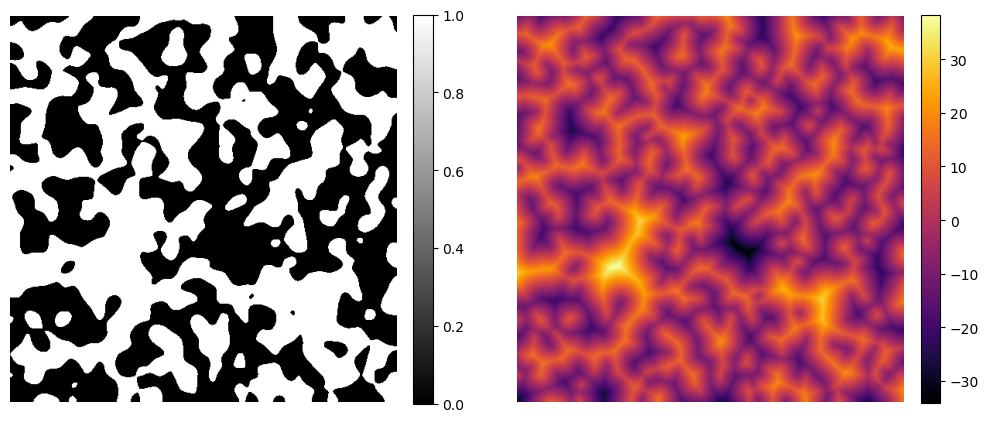

In [35]:
image_sdt = dpm.metrics.sdt(image)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
im = ax[0].imshow(image[1], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[0].axis(False)
im = ax[1].imshow(image_sdt[1], cmap="inferno")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[1].axis(False)